In [357]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

In [358]:
df = pd.read_csv('EV_cars_India_2023 (1).csv')
df.head(30)

,Car_name,Car_price,Batter_cap,Drive_range,Power,Charge_time,transmission,Boot_space,Top_speed
0,MG Comet EV,7.98 lakh,17.3 kWh,230 km/full charge,41.42 Bhp,7 Hours,Automatic,350 L,140kmph
1,Tata Tiago EV,8.69 - 11.99 lakh,19.2 KWh,250 km/full charge,60.34 - 73.75 Bhp,58 Min(10-80%),Automatic,240 L (Liters),116kmph
2,Tata Tigor EV,12.49 - 13.75 lakh,26 kWh,315 km/full charge,73.75 Bhp,7.5h,Automatic,316 L (Liters),120kmph
3,MG ZS EV,23.38 - 27.40 lakh,50.3 kWh,461 km/full charge,174.33 Bhp,8.5 to 9 Hours,Automatic,470 L,140kmph
4,BYD Atto 3,33.99 - 34.49 lakh,60.48 kWh,521 km/full charge,201.15 Bhp,9.5-10 Hours,Automatic,440 L (Liters),90kmph
5,Hyundai Kona Electric,23.84 - 24.03 lakh,39.2kWh,452 km/full charge,134.1 Bhp,6.16 Hours,Automatic,332 L,165kmph
6,Mahindra XUV400 EV,15.99 - 18.99 lakh,34.5 kWh,375 s km/full charge,147.51bhp,50min,Automatic,378 L,150kmph
7,Tata Nexon EV Max,16.49 - 19.54 lakh,40.5 kWh,453 km/full charge,141.04 Bhp,15 Hours,Automatic,350 L (Liters),140kmph
8,Mercedes-Benz EQS,1.59 - 2.4 lakh,17.3 kWh,230 km/full charge,41.42 Bhp,7 Hours,Automatic,610 L,210kmph
9,Audi e-tron GT,1.7 cr,19.2 KWh,250 km/full charge,60.34 - 73.75 Bhp,58 Min(10-80%),Automatic,240 L (Liters),245kmph


Handle the data in car price column

In [359]:
def clean_price_adjusted(price):
    price = price.lower().replace(' lakh', '').replace(' cr', '')
    if '-' in price:
        low, high = price.split('-')
        low = float(low.strip()) * 100 if 'cr' in low else float(low.strip())
        high = float(high.strip()) * 100 if 'cr' in high else float(high.strip())
        return (low + high) / 2
    else:
        return float(price) * 100 if 'cr' in price else float(price)

# Apply the function to the 'Car_price' column
df['Average_Price'] = df['Car_price'].apply(clean_price_adjusted)

# Optional: Segmenting the data based on price
df['Price_Segment'] = pd.cut(df['Average_Price'], bins=[0, 10, 20, float('inf')],
                                  labels=['Low', 'Medium', 'High'])

# View the first few rows to verify the changes
df.head(30)


,Car_name,Car_price,Batter_cap,Drive_range,Power,Charge_time,transmission,Boot_space,Top_speed,Average_Price,Price_Segment
0,MG Comet EV,7.98 lakh,17.3 kWh,230 km/full charge,41.42 Bhp,7 Hours,Automatic,350 L,140kmph,7.980,Low
1,Tata Tiago EV,8.69 - 11.99 lakh,19.2 KWh,250 km/full charge,60.34 - 73.75 Bhp,58 Min(10-80%),Automatic,240 L (Liters),116kmph,10.340,Medium
2,Tata Tigor EV,12.49 - 13.75 lakh,26 kWh,315 km/full charge,73.75 Bhp,7.5h,Automatic,316 L (Liters),120kmph,13.120,Medium
3,MG ZS EV,23.38 - 27.40 lakh,50.3 kWh,461 km/full charge,174.33 Bhp,8.5 to 9 Hours,Automatic,470 L,140kmph,25.390,High
4,BYD Atto 3,33.99 - 34.49 lakh,60.48 kWh,521 km/full charge,201.15 Bhp,9.5-10 Hours,Automatic,440 L (Liters),90kmph,34.240,High
5,Hyundai Kona Electric,23.84 - 24.03 lakh,39.2kWh,452 km/full charge,134.1 Bhp,6.16 Hours,Automatic,332 L,165kmph,23.935,High
6,Mahindra XUV400 EV,15.99 - 18.99 lakh,34.5 kWh,375 s km/full charge,147.51bhp,50min,Automatic,378 L,150kmph,17.490,Medium
7,Tata Nexon EV Max,16.49 - 19.54 lakh,40.5 kWh,453 km/full charge,141.04 Bhp,15 Hours,Automatic,350 L (Liters),140kmph,18.015,Medium
8,Mercedes-Benz EQS,1.59 - 2.4 lakh,17.3 kWh,230 km/full charge,41.42 Bhp,7 Hours,Automatic,610 L,210kmph,1.995,Low
9,Audi e-tron GT,1.7 cr,19.2 KWh,250 km/full charge,60.34 - 73.75 Bhp,58 Min(10-80%),Automatic,240 L (Liters),245kmph,1.700,Low


Handling rest of the data

In [360]:
def extract_numeric(value):
    import re
    numbers = re.findall(r"[-+]?\d*\.\d+|\d+", value)
    return float(numbers[0]) if numbers else None


In [361]:
df['Drive_range_km'] = df['Drive_range'].apply(extract_numeric)
df.head(21)


,Car_name,Car_price,Batter_cap,Drive_range,Power,Charge_time,transmission,Boot_space,Top_speed,Average_Price,Price_Segment,Drive_range_km
0,MG Comet EV,7.98 lakh,17.3 kWh,230 km/full charge,41.42 Bhp,7 Hours,Automatic,350 L,140kmph,7.980,Low,230.0
1,Tata Tiago EV,8.69 - 11.99 lakh,19.2 KWh,250 km/full charge,60.34 - 73.75 Bhp,58 Min(10-80%),Automatic,240 L (Liters),116kmph,10.340,Medium,250.0
2,Tata Tigor EV,12.49 - 13.75 lakh,26 kWh,315 km/full charge,73.75 Bhp,7.5h,Automatic,316 L (Liters),120kmph,13.120,Medium,315.0
3,MG ZS EV,23.38 - 27.40 lakh,50.3 kWh,461 km/full charge,174.33 Bhp,8.5 to 9 Hours,Automatic,470 L,140kmph,25.390,High,461.0
4,BYD Atto 3,33.99 - 34.49 lakh,60.48 kWh,521 km/full charge,201.15 Bhp,9.5-10 Hours,Automatic,440 L (Liters),90kmph,34.240,High,521.0
5,Hyundai Kona Electric,23.84 - 24.03 lakh,39.2kWh,452 km/full charge,134.1 Bhp,6.16 Hours,Automatic,332 L,165kmph,23.935,High,452.0
6,Mahindra XUV400 EV,15.99 - 18.99 lakh,34.5 kWh,375 s km/full charge,147.51bhp,50min,Automatic,378 L,150kmph,17.490,Medium,375.0
7,Tata Nexon EV Max,16.49 - 19.54 lakh,40.5 kWh,453 km/full charge,141.04 Bhp,15 Hours,Automatic,350 L (Liters),140kmph,18.015,Medium,453.0
8,Mercedes-Benz EQS,1.59 - 2.4 lakh,17.3 kWh,230 km/full charge,41.42 Bhp,7 Hours,Automatic,610 L,210kmph,1.995,Low,230.0
9,Audi e-tron GT,1.7 cr,19.2 KWh,250 km/full charge,60.34 - 73.75 Bhp,58 Min(10-80%),Automatic,240 L (Liters),245kmph,1.700,Low,250.0


In [362]:
df['Power_Bhp'] = df['Power'].apply(extract_numeric)
df.head(20)


,Car_name,Car_price,Batter_cap,Drive_range,Power,Charge_time,transmission,Boot_space,Top_speed,Average_Price,Price_Segment,Drive_range_km,Power_Bhp
0,MG Comet EV,7.98 lakh,17.3 kWh,230 km/full charge,41.42 Bhp,7 Hours,Automatic,350 L,140kmph,7.980,Low,230.0,41.42
1,Tata Tiago EV,8.69 - 11.99 lakh,19.2 KWh,250 km/full charge,60.34 - 73.75 Bhp,58 Min(10-80%),Automatic,240 L (Liters),116kmph,10.340,Medium,250.0,60.34
2,Tata Tigor EV,12.49 - 13.75 lakh,26 kWh,315 km/full charge,73.75 Bhp,7.5h,Automatic,316 L (Liters),120kmph,13.120,Medium,315.0,73.75
3,MG ZS EV,23.38 - 27.40 lakh,50.3 kWh,461 km/full charge,174.33 Bhp,8.5 to 9 Hours,Automatic,470 L,140kmph,25.390,High,461.0,174.33
4,BYD Atto 3,33.99 - 34.49 lakh,60.48 kWh,521 km/full charge,201.15 Bhp,9.5-10 Hours,Automatic,440 L (Liters),90kmph,34.240,High,521.0,201.15
5,Hyundai Kona Electric,23.84 - 24.03 lakh,39.2kWh,452 km/full charge,134.1 Bhp,6.16 Hours,Automatic,332 L,165kmph,23.935,High,452.0,134.10
6,Mahindra XUV400 EV,15.99 - 18.99 lakh,34.5 kWh,375 s km/full charge,147.51bhp,50min,Automatic,378 L,150kmph,17.490,Medium,375.0,147.51
7,Tata Nexon EV Max,16.49 - 19.54 lakh,40.5 kWh,453 km/full charge,141.04 Bhp,15 Hours,Automatic,350 L (Liters),140kmph,18.015,Medium,453.0,141.04
8,Mercedes-Benz EQS,1.59 - 2.4 lakh,17.3 kWh,230 km/full charge,41.42 Bhp,7 Hours,Automatic,610 L,210kmph,1.995,Low,230.0,41.42
9,Audi e-tron GT,1.7 cr,19.2 KWh,250 km/full charge,60.34 - 73.75 Bhp,58 Min(10-80%),Automatic,240 L (Liters),245kmph,1.700,Low,250.0,60.34


In [363]:
m = df.index[df['Charge_time'].str.contains('min')].tolist()
M = df.index[df['Charge_time'].str.contains('Min')].tolist()
for i in m:
    df.at[i,'Charge_time'] = str(extract_numeric(df.loc[i]['Charge_time'])/60)
for i in M:
    df.at[i,'Charge_time'] = str(extract_numeric(df.loc[i]['Charge_time'])/60)

df['Charge_time_hours'] = df['Charge_time'].apply(extract_numeric)

df.head(30)


,Car_name,Car_price,Batter_cap,Drive_range,Power,Charge_time,transmission,Boot_space,Top_speed,Average_Price,Price_Segment,Drive_range_km,Power_Bhp,Charge_time_hours
0,MG Comet EV,7.98 lakh,17.3 kWh,230 km/full charge,41.42 Bhp,7 Hours,Automatic,350 L,140kmph,7.980,Low,230.0,41.42,7.000000
1,Tata Tiago EV,8.69 - 11.99 lakh,19.2 KWh,250 km/full charge,60.34 - 73.75 Bhp,0.9666666666666667,Automatic,240 L (Liters),116kmph,10.340,Medium,250.0,60.34,0.966667
2,Tata Tigor EV,12.49 - 13.75 lakh,26 kWh,315 km/full charge,73.75 Bhp,7.5h,Automatic,316 L (Liters),120kmph,13.120,Medium,315.0,73.75,7.500000
3,MG ZS EV,23.38 - 27.40 lakh,50.3 kWh,461 km/full charge,174.33 Bhp,8.5 to 9 Hours,Automatic,470 L,140kmph,25.390,High,461.0,174.33,8.500000
4,BYD Atto 3,33.99 - 34.49 lakh,60.48 kWh,521 km/full charge,201.15 Bhp,9.5-10 Hours,Automatic,440 L (Liters),90kmph,34.240,High,521.0,201.15,9.500000
5,Hyundai Kona Electric,23.84 - 24.03 lakh,39.2kWh,452 km/full charge,134.1 Bhp,6.16 Hours,Automatic,332 L,165kmph,23.935,High,452.0,134.10,6.160000
6,Mahindra XUV400 EV,15.99 - 18.99 lakh,34.5 kWh,375 s km/full charge,147.51bhp,0.8333333333333334,Automatic,378 L,150kmph,17.490,Medium,375.0,147.51,0.833333
7,Tata Nexon EV Max,16.49 - 19.54 lakh,40.5 kWh,453 km/full charge,141.04 Bhp,15 Hours,Automatic,350 L (Liters),140kmph,18.015,Medium,453.0,141.04,15.000000
8,Mercedes-Benz EQS,1.59 - 2.4 lakh,17.3 kWh,230 km/full charge,41.42 Bhp,7 Hours,Automatic,610 L,210kmph,1.995,Low,230.0,41.42,7.000000
9,Audi e-tron GT,1.7 cr,19.2 KWh,250 km/full charge,60.34 - 73.75 Bhp,0.9666666666666667,Automatic,240 L (Liters),245kmph,1.700,Low,250.0,60.34,0.966667


In [364]:
df['Boot_space_L'] = df['Boot_space'].apply(extract_numeric)
df.head(20)


,Car_name,Car_price,Batter_cap,Drive_range,Power,Charge_time,transmission,Boot_space,Top_speed,Average_Price,Price_Segment,Drive_range_km,Power_Bhp,Charge_time_hours,Boot_space_L
0,MG Comet EV,7.98 lakh,17.3 kWh,230 km/full charge,41.42 Bhp,7 Hours,Automatic,350 L,140kmph,7.980,Low,230.0,41.42,7.000000,350.0
1,Tata Tiago EV,8.69 - 11.99 lakh,19.2 KWh,250 km/full charge,60.34 - 73.75 Bhp,0.9666666666666667,Automatic,240 L (Liters),116kmph,10.340,Medium,250.0,60.34,0.966667,240.0
2,Tata Tigor EV,12.49 - 13.75 lakh,26 kWh,315 km/full charge,73.75 Bhp,7.5h,Automatic,316 L (Liters),120kmph,13.120,Medium,315.0,73.75,7.500000,316.0
3,MG ZS EV,23.38 - 27.40 lakh,50.3 kWh,461 km/full charge,174.33 Bhp,8.5 to 9 Hours,Automatic,470 L,140kmph,25.390,High,461.0,174.33,8.500000,470.0
4,BYD Atto 3,33.99 - 34.49 lakh,60.48 kWh,521 km/full charge,201.15 Bhp,9.5-10 Hours,Automatic,440 L (Liters),90kmph,34.240,High,521.0,201.15,9.500000,440.0
5,Hyundai Kona Electric,23.84 - 24.03 lakh,39.2kWh,452 km/full charge,134.1 Bhp,6.16 Hours,Automatic,332 L,165kmph,23.935,High,452.0,134.10,6.160000,332.0
6,Mahindra XUV400 EV,15.99 - 18.99 lakh,34.5 kWh,375 s km/full charge,147.51bhp,0.8333333333333334,Automatic,378 L,150kmph,17.490,Medium,375.0,147.51,0.833333,378.0
7,Tata Nexon EV Max,16.49 - 19.54 lakh,40.5 kWh,453 km/full charge,141.04 Bhp,15 Hours,Automatic,350 L (Liters),140kmph,18.015,Medium,453.0,141.04,15.000000,350.0
8,Mercedes-Benz EQS,1.59 - 2.4 lakh,17.3 kWh,230 km/full charge,41.42 Bhp,7 Hours,Automatic,610 L,210kmph,1.995,Low,230.0,41.42,7.000000,610.0
9,Audi e-tron GT,1.7 cr,19.2 KWh,250 km/full charge,60.34 - 73.75 Bhp,0.9666666666666667,Automatic,240 L (Liters),245kmph,1.700,Low,250.0,60.34,0.966667,240.0


In [365]:
df['Top_speed_km'] = df['Top_speed'].apply(extract_numeric)


Analyzing Battery Capacity and Drive Range in Each Price Segment

In [366]:
# Analyzing Battery Capacity and Drive Range in Each Price Segment
battery_drive_analysis = df.groupby('Price_Segment')[['Batter_cap', 'Drive_range']].describe()
print(battery_drive_analysis)


              Batter_cap                       Drive_range         \
                   count unique       top freq       count unique   
Price_Segment                                                       
Low                   12     11  17.3 kWh    2          12     11   
Medium                 6      6  19.2 KWh    1           6      6   
High                  12     11  50.3 kWh    2          12     11   

                                         
                               top freq  
Price_Segment                            
Low            230  km/full charge    2  
Medium          250 km/full charge    1  
High            461 km/full charge    2  


Analyzing Power and Charging Time in Each Price Segment

In [367]:
# Analyzing Power and Charging Time in Each Price Segment
power_charge_analysis = df.groupby('Price_Segment')[['Power', 'Charge_time']].describe()
print(power_charge_analysis)


              Power                                Charge_time         \
              count unique                top freq       count unique   
Price_Segment                                                           
Low              12     11          41.42 Bhp    2          12     11   
Medium            6      6  60.34 - 73.75 Bhp    1           6      6   
High             12     11         174.33 Bhp    2          12     11   

                                        
                              top freq  
Price_Segment                           
Low                       7 Hours    2  
Medium         0.9666666666666667    1  
High               8.5 to 9 Hours    2  


Summary Statistics for Each Segment

In [368]:
# Summary Statistics for Each Segment
summary_stats = df.groupby('Price_Segment').describe()
print(summary_stats)


              Average_Price                                                  \
                      count       mean        std     min      25%      50%   
Price_Segment                                                                 
Low                    12.0   3.290417   2.783372   1.110   1.5750   1.9075   
Medium                  6.0  14.489167   3.095711  10.340  12.3775  14.4800   
High                   12.0  51.642917  23.388520  23.935  32.9675  48.7250   

                               Drive_range_km              ... Boot_space_L  \
                   75%     max          count        mean  ...          75%   
Price_Segment                                              ...                
Low             4.5725   9.295           12.0  403.250000  ...       506.25   
Medium         17.0775  18.015            6.0  363.333333  ...       371.00   
High           66.2125  99.500           12.0  476.000000  ...       492.50   

                     Top_speed_km                 

Price Range Distribution

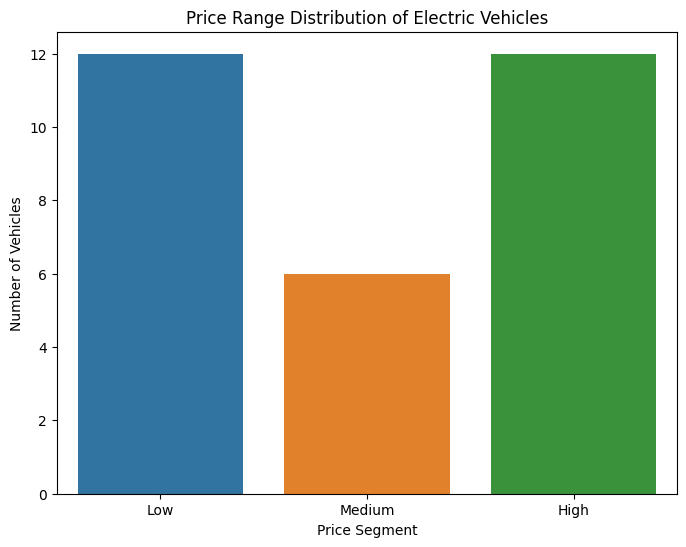

In [369]:
def plot_price_range_distribution(data):
    plt.figure(figsize=(8, 6))
    sns.countplot(x='Price_Segment', data=data)
    plt.title('Price Range Distribution of Electric Vehicles')
    plt.xlabel('Price Segment')
    plt.ylabel('Number of Vehicles')
    plt.show()


plot_price_range_distribution(df)


Battery Capacity vs. Drive Range

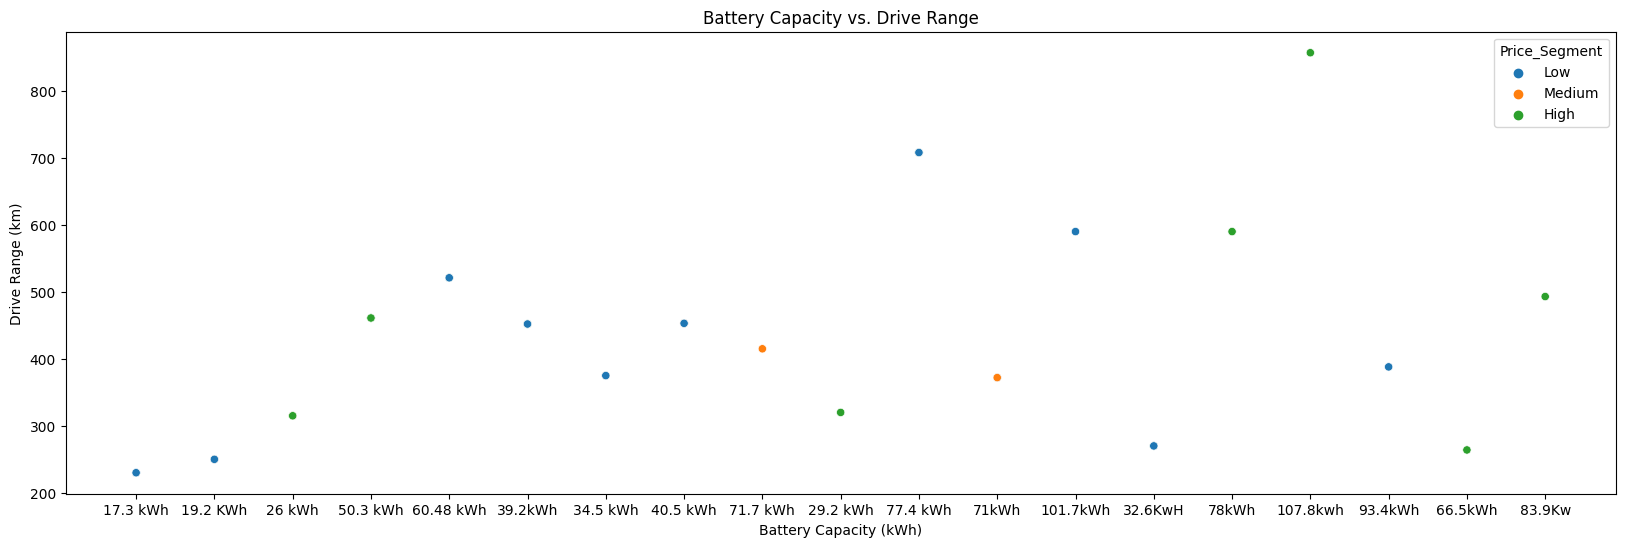

In [370]:
def plot_battery_capacity_vs_range(data):
    plt.figure(figsize=(20, 6))
    sns.scatterplot(x='Batter_cap', y='Drive_range_km', hue='Price_Segment', data=data)
    plt.title('Battery Capacity vs. Drive Range')
    plt.xlabel('Battery Capacity (kWh)')
    plt.ylabel('Drive Range (km)')
    plt.show()
plot_battery_capacity_vs_range(df)

Average Power in Each Price Segment

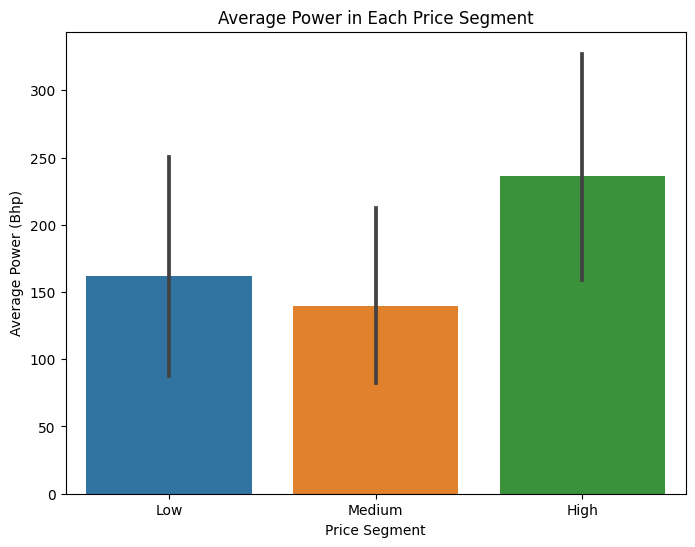

In [371]:
def plot_average_power_by_segment(data):
    plt.figure(figsize=(8, 6))
    sns.barplot(x='Price_Segment', y='Power_Bhp', data=data)
    plt.title('Average Power in Each Price Segment')
    plt.xlabel('Price Segment')
    plt.ylabel('Average Power (Bhp)')
    plt.show()

plot_average_power_by_segment(df)

Charge Time Distribution

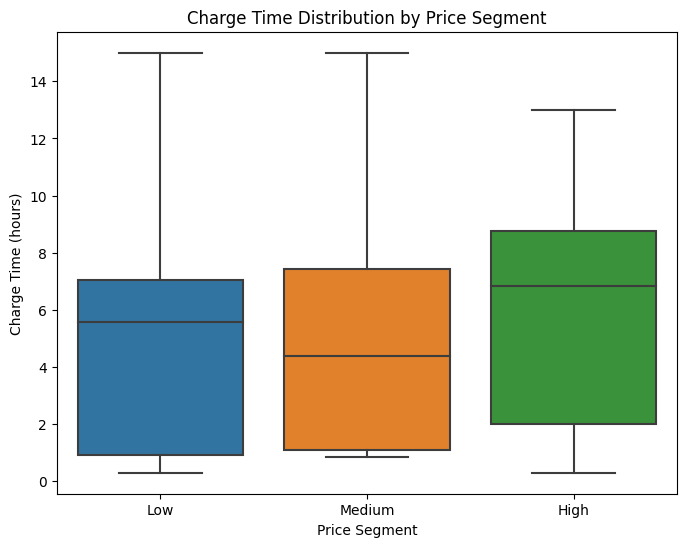

In [372]:
def plot_charge_time_distribution(data):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Price_Segment', y='Charge_time_hours', data=data)
    plt.title('Charge Time Distribution by Price Segment')
    plt.xlabel('Price Segment')
    plt.ylabel('Charge Time (hours)')
    plt.show()

plot_charge_time_distribution(df)

Boot Space Comparison

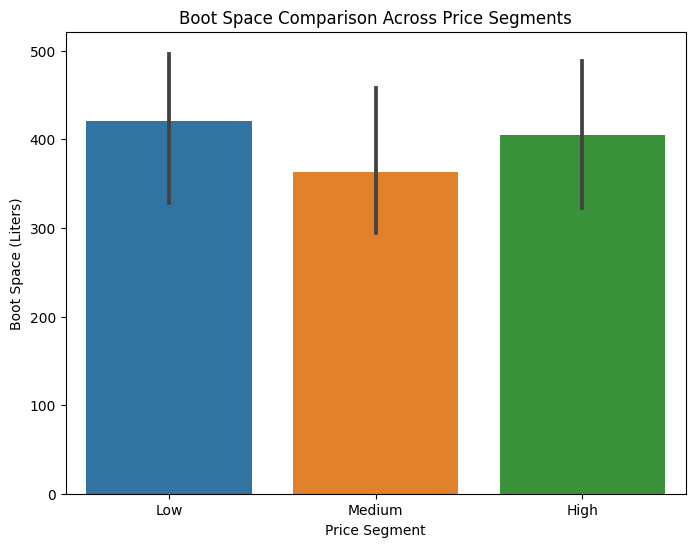

In [373]:
def plot_boot_space_comparison(data):
    plt.figure(figsize=(8, 6))
    sns.barplot(x='Price_Segment', y='Boot_space_L', data=data)
    plt.title('Boot Space Comparison Across Price Segments')
    plt.xlabel('Price Segment')
    plt.ylabel('Boot Space (Liters)')
    plt.show()


plot_boot_space_comparison(df)

Top Speed vs. Price

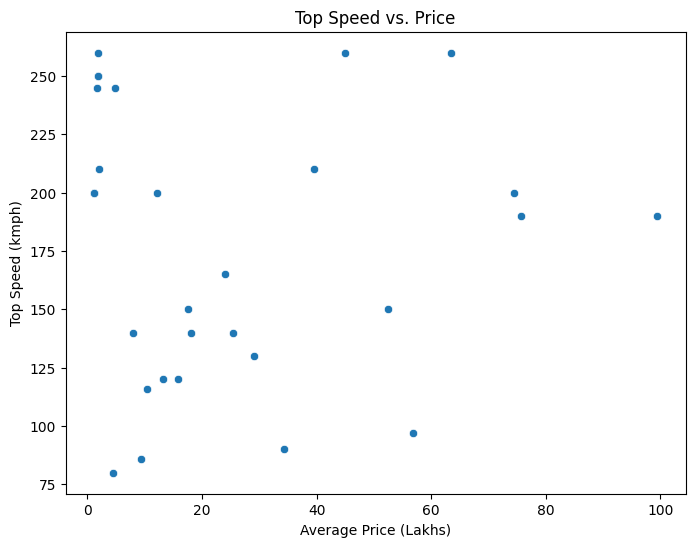

In [374]:
def plot_top_speed_vs_price(data):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Average_Price', y='Top_speed_km', data=data)
    plt.title('Top Speed vs. Price')
    plt.xlabel('Average Price (Lakhs)')
    plt.ylabel('Top Speed (kmph)')
    plt.show()

plot_top_speed_vs_price(df)

In [375]:
df.head()

,Car_name,Car_price,Batter_cap,Drive_range,Power,Charge_time,transmission,Boot_space,Top_speed,Average_Price,Price_Segment,Drive_range_km,Power_Bhp,Charge_time_hours,Boot_space_L,Top_speed_km
0,MG Comet EV,7.98 lakh,17.3 kWh,230 km/full charge,41.42 Bhp,7 Hours,Automatic,350 L,140kmph,7.98,Low,230.0,41.42,7.000000,350.0,140.0
1,Tata Tiago EV,8.69 - 11.99 lakh,19.2 KWh,250 km/full charge,60.34 - 73.75 Bhp,0.9666666666666667,Automatic,240 L (Liters),116kmph,10.34,Medium,250.0,60.34,0.966667,240.0,116.0
2,Tata Tigor EV,12.49 - 13.75 lakh,26 kWh,315 km/full charge,73.75 Bhp,7.5h,Automatic,316 L (Liters),120kmph,13.12,Medium,315.0,73.75,7.500000,316.0,120.0
3,MG ZS EV,23.38 - 27.40 lakh,50.3 kWh,461 km/full charge,174.33 Bhp,8.5 to 9 Hours,Automatic,470 L,140kmph,25.39,High,461.0,174.33,8.500000,470.0,140.0
4,BYD Atto 3,33.99 - 34.49 lakh,60.48 kWh,521 km/full charge,201.15 Bhp,9.5-10 Hours,Automatic,440 L (Liters),90kmph,34.24,High,521.0,201.15,9.500000,440.0,90.0


Determining optimal clusters

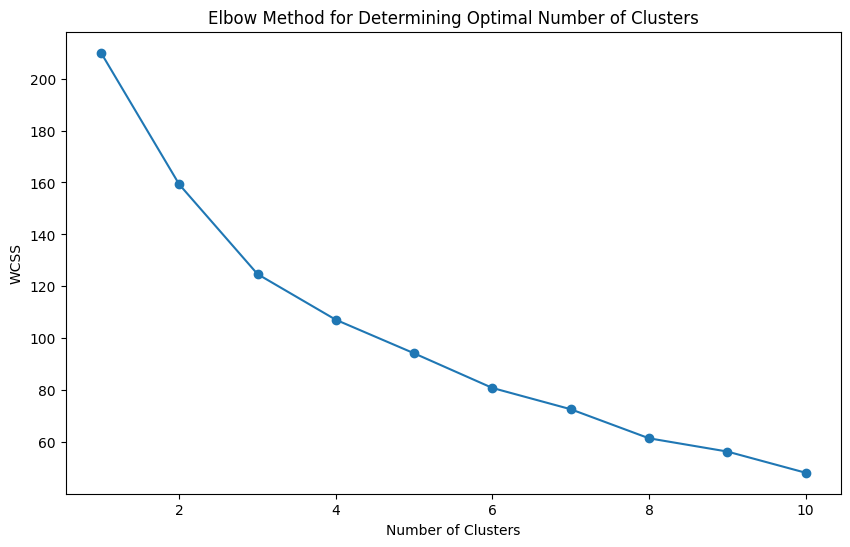

In [376]:
x = df.drop(['Car_name','Car_price','Batter_cap','Drive_range','Power','Charge_time','transmission','Boot_space','Top_speed'],axis=1)
label = LabelEncoder()
x['Ps_encoded'] = label.fit_transform(x['Price_Segment'])
x.drop('Price_Segment',axis=1,inplace=True)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(x)

wcss = []  # Within-Cluster Sum of Square
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42,n_init=10)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Determining Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()





we got 3 optimal clusters

In [377]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42,n_init=10)
cluster_labels = kmeans.fit_predict(scaled_data)
x['Cluster'] = cluster_labels

cluster_summary = x.groupby('Cluster').mean()
print(cluster_summary)



         Average_Price  Drive_range_km   Power_Bhp  Charge_time_hours  \
Cluster                                                                 
0             7.713125      357.562500  125.943750           5.891250   
1            51.096111      395.222222  172.795556           7.410370   
2            32.572000      690.600000  408.162000           0.833333   

         Boot_space_L  Top_speed_km  Ps_encoded  
Cluster                                          
0          382.437500    172.625000       1.375  
1          363.777778    168.333333       0.000  
2          540.800000    203.400000       0.400  


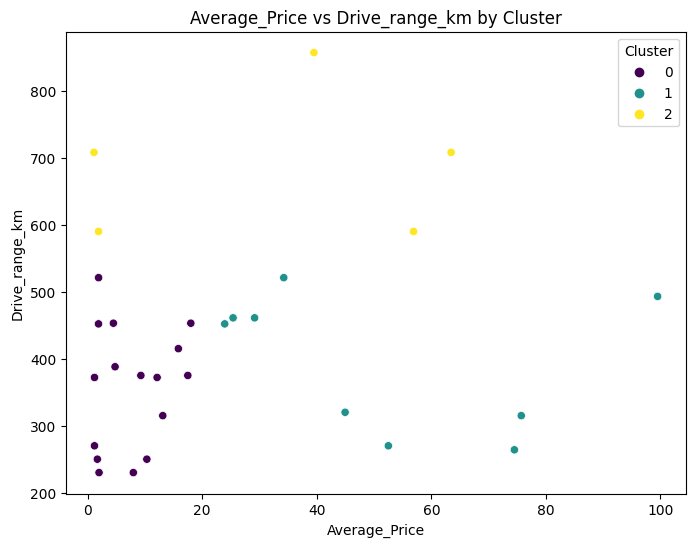

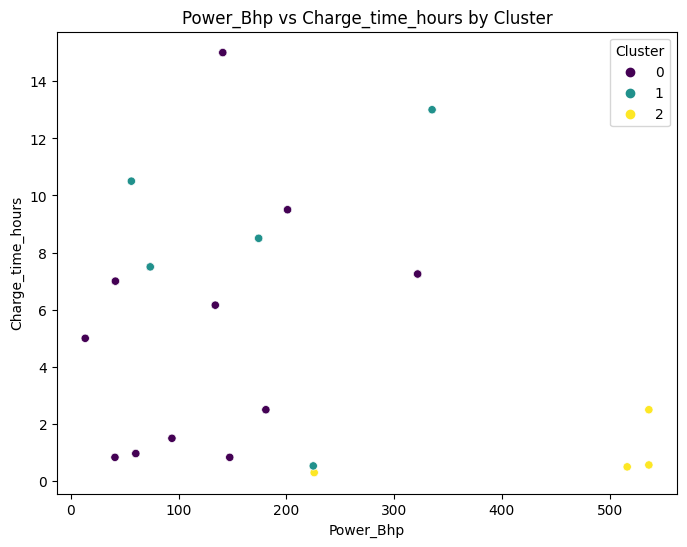

In [378]:
def plot_clusters(data, x_feature, y_feature, cluster_col, centroids=None, x_idx=None, y_idx=None):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=data, x=x_feature, y=y_feature, hue=cluster_col, palette='viridis')
    if centroids is not None:
        plt.scatter(centroids[:, x_idx], 
                    centroids[:, y_idx], 
                    s=100, c='red', marker='X')
    plt.title(f'{x_feature} vs {y_feature} by Cluster')
    plt.xlabel(x_feature)
    plt.ylabel(y_feature)
    plt.show()


plot_clusters(x, 'Average_Price', 'Drive_range_km', 'Cluster')
plot_clusters(x, 'Power_Bhp', 'Charge_time_hours', 'Cluster')
